In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df_healthy = pd.read_csv('healthy_data.csv')
df_PD_MCI_LBD = pd.read_csv('PD_MCI_LBD_data.csv')
df_PD = pd.read_csv('PD_data.csv')
df_AD_MCI = pd.read_csv('AD_MCI_data.csv')

In [3]:
df_AD_MCI.set_index('group', inplace=True)
df_healthy.set_index('group', inplace=True)
df_PD.set_index('group', inplace=True)
df_PD_MCI_LBD.set_index('group', inplace=True)

In [4]:
groups = ['AD_MCI','healthy','PD','PD_MCI_LBD']

In [5]:
# Confirm the headers of all the dataframes are the same
list(df_AD_MCI.columns) == list(df_healthy.columns) == list(df_PD.columns) == list(df_PD_MCI_LBD.columns)

True

In [6]:
list_columns = list(df_AD_MCI.columns)

In [7]:
def reversed_delimited_tuple(string,delimiter='|'):
    delimited_tuple = string.split(delimiter)
    reversed_tuple = delimited_tuple[::-1]
    return reversed_tuple

In [8]:
# List proteins by last short-name identifier used in column title
list_proteins = []
for protein_string in list_columns:
    list_proteins.append(reversed_delimited_tuple(protein_string)[0])

In [9]:
# Confirm this list is unique
for elem in list_proteins:
    if list_proteins.count(elem) > 1:
        print(elem)
    else:
        pass

In [10]:
# Create dictionary of extended protein info : short identifier
dict_proteins = {}
for i in range(0,len(list_proteins)):
    dict_proteins[list_columns[i]] = list_proteins[i]

In [11]:
df_AD_MCI = df_AD_MCI.rename(columns=dict_proteins)
df_healthy = df_healthy.rename(columns=dict_proteins)
df_PD = df_PD.rename(columns=dict_proteins)
df_PD_MCI_LBD = df_PD_MCI_LBD.rename(columns=dict_proteins)

In [12]:
df_AD_MCI.head()

,KV37,LV469,LV861,LVX54,LV746,LV218,LV316,LV312,LV310,LV39,...,EMIL3,ABCD2,TEN1,PCDAD,ITM2B,ADSV,A0A1W2PRN1,APOF,DCBD2,LMF2
group,,,,,,,,,,,,,,,,,,,,,
AD_MCI_TPAD0210,28.898373,24.125336,22.676771,20.327832,25.570557,24.797337,23.543465,22.555490,22.783560,23.245883,...,20.373782,19.310236,17.856492,18.453124,NaN,20.879716,24.781034,NaN,NaN,NaN
AD_MCI_TPAD0262,28.915048,22.824361,23.197649,19.990306,25.316286,23.571908,24.051694,22.300534,23.046184,24.363683,...,17.709244,NaN,16.816413,17.987179,NaN,NaN,NaN,19.805173,21.125776,NaN
AD_MCI_TPAD0266,28.274292,24.358802,24.066243,23.589011,26.241142,26.079288,24.586944,24.266694,23.910209,25.419193,...,20.682527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD_MCI_TPAD0273,29.193195,22.187373,23.550432,20.329372,25.789922,24.700275,23.881087,22.998723,22.430900,23.599526,...,20.929981,22.488293,17.568634,16.772132,16.934531,18.446332,24.750659,NaN,NaN,NaN
AD_MCI_TPAD0292,28.212282,22.520379,24.504620,20.681650,26.287648,25.020801,23.176368,23.293055,22.188477,22.789873,...,21.209263,NaN,18.116146,18.547994,18.692276,NaN,NaN,20.264877,21.677769,16.254727


In [13]:
def gen_volcano_tuple(test_frame,control_frame):
    # Returns ['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value']
    datalist = []
    
    for protein in list_proteins:
        t_stat, p_stat = scipy.stats.ttest_ind(test_frame[protein],control_frame[protein],equal_var=False)
        datalist.append([protein,test_frame[protein].mean(), control_frame[protein].mean(),
                        np.log2(test_frame[protein].mean()/control_frame[protein].mean()),
                        float(t_stat), float(np.log10(p_stat))*-1])

    return datalist

In [14]:
AD_MCI_volcano_datalist = gen_volcano_tuple(df_AD_MCI,df_healthy)

PD_volcano_datalist = gen_volcano_tuple(df_PD,df_healthy)

PD_MCI_LBD_volcano_datalist = gen_volcano_tuple(df_PD_MCI_LBD,df_healthy)


In [15]:
df_volcano_AD_MCI = pd.DataFrame(data=AD_MCI_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD = pd.DataFrame(data=PD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD_MCI = pd.DataFrame(data=PD_MCI_LBD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])

In [16]:
df_volcano_AD_MCI['significant_0.05'] = df_volcano_AD_MCI['log10_p_value'] > 1.3
df_volcano_PD['significant_0.05'] = df_volcano_PD['log10_p_value'] > 1.3
df_volcano_PD_MCI['significant_0.05'] = df_volcano_PD_MCI['log10_p_value'] > 1.3

In [17]:
import altair

ModuleNotFoundError: No module named 'altair'

In [ ]:
altair.Chart(df_volcano_AD_MCI).mark_point().encode(
    x='log2_FC:Q',
    y='log10_p_value:Q',
    color='significant_0.05:O')

In [ ]:
altair.Chart(df_volcano_PD).mark_point().encode(
    x='log2_FC:Q',
    y='log10_p_value:Q',
    color='significant_0.05:O')

In [ ]:
altair.Chart(df_volcano_PD_MCI).mark_point().encode(
    x='log2_FC:Q',
    y='log10_p_value:Q',
    color='significant_0.05:O')

<font size=4>__Seaborn updated!__

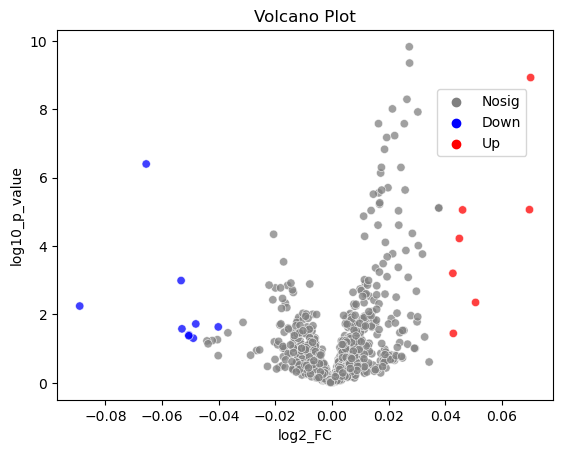

In [18]:
df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC>0.04)&(df_volcano_AD_MCI.log10_p_value>1.3),'type']='Up'
df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC<0.04)&(df_volcano_AD_MCI.log10_p_value>1.3),'type']='Down'
df_volcano_AD_MCI.loc[(abs(df_volcano_AD_MCI.log2_FC)<=0.04)|(df_volcano_AD_MCI.log10_p_value<=1.3),'type']='Nosig'

colors = ["grey","blue","red"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_AD_MCI, hue='type', palette=colors, alpha=0.75)

ax.set_title("Volcano Plot")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)

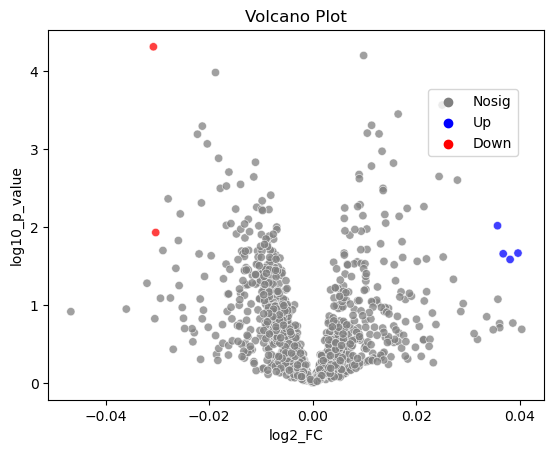

In [19]:
df_volcano_PD.loc[(df_volcano_PD.log2_FC>0.03)&(df_volcano_PD.log10_p_value>1.3),'type']='Up'
df_volcano_PD.loc[(df_volcano_PD.log2_FC<0.03)&(df_volcano_PD.log10_p_value>1.3),'type']='Down'
df_volcano_PD.loc[(abs(df_volcano_PD.log2_FC)<=0.03)|(df_volcano_PD.log10_p_value<=1.3),'type']='Nosig'

colors = ["grey","blue","red"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_PD, hue='type', palette=colors, alpha=0.75)

ax.set_title("Volcano Plot")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)

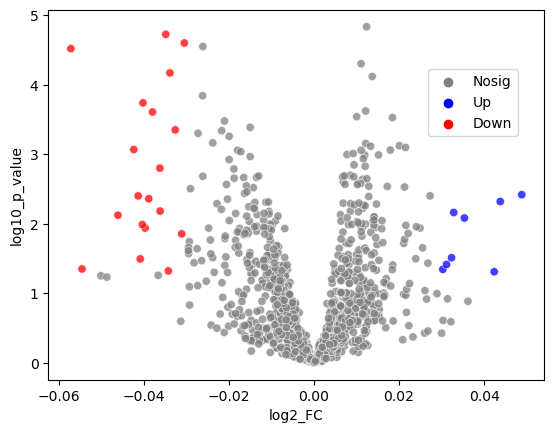

In [33]:
df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC>0.03)&(df_volcano_PD_MCI.log10_p_value>1.3),'type']='Up'
df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC<0.03)&(df_volcano_PD_MCI.log10_p_value>1.3),'type']='Down'
df_volcano_PD_MCI.loc[(abs(df_volcano_PD_MCI.log2_FC)<=0.03)|(df_volcano_PD_MCI.log10_p_value<=1.3),'type']='Nosig'

colors = ["grey","blue","red"]

ax=sns.scatterplot(x='log2_FC', y='log10_p_value',data=df_volcano_PD_MCI, hue='type', palette=colors, alpha=0.75)


ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)

<font size=4>__Matplotlib updated!__

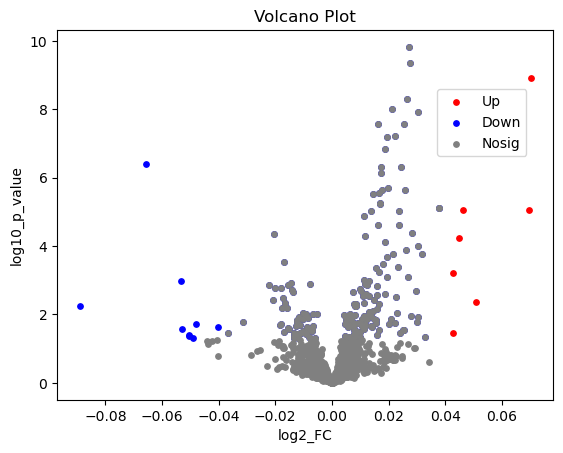

In [57]:
Up_AD_MCI = df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC>0.04)&(df_volcano_AD_MCI.log10_p_value>1.3)]
Down_AD_MCI = df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC<0.04)&(df_volcano_AD_MCI.log10_p_value>1.3)]
Nosig_AD_MCI = df_volcano_AD_MCI.loc[(abs(df_volcano_AD_MCI.log2_FC)<=0.04)|(df_volcano_AD_MCI.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Up_AD_MCI['log2_FC'], Up_AD_MCI['log10_p_value'], color='red', label='Up', s=15)
ax.scatter(Down_AD_MCI['log2_FC'], Down_AD_MCI['log10_p_value'], color='blue', label='Down', s=15)
ax.scatter(Nosig_AD_MCI['log2_FC'], Nosig_AD_MCI['log10_p_value'], color='grey', label='Nosig', s=15)

ax.set_title("Volcano Plot")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)

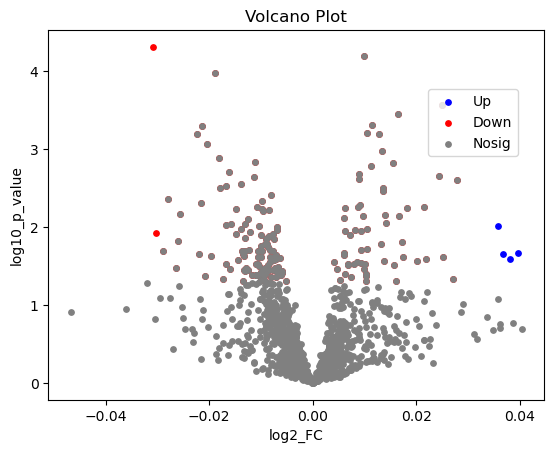

In [56]:
Up_PD = df_volcano_PD.loc[(df_volcano_PD.log2_FC>0.03)&(df_volcano_PD.log10_p_value>1.3)]
Down_PD = df_volcano_PD.loc[(df_volcano_PD.log2_FC<0.03)&(df_volcano_PD.log10_p_value>1.3)]
Nosig_PD =df_volcano_PD.loc[(abs(df_volcano_PD.log2_FC)<=0.03)|(df_volcano_PD.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Up_PD['log2_FC'], Up_PD['log10_p_value'], color='blue', label='Up', s=15)
ax.scatter(Down_PD['log2_FC'], Down_PD['log10_p_value'], color='red', label='Down', s=15)
ax.scatter(Nosig_PD['log2_FC'], Nosig_PD['log10_p_value'], color='grey', label='Nosig', s=15)

ax.set_title("Volcano Plot")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)

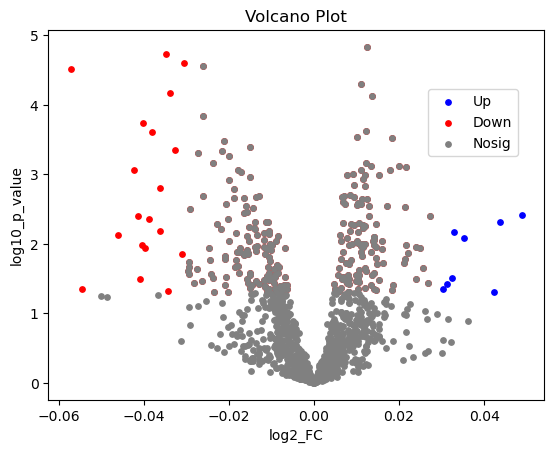

In [55]:
Up_PD_MCI = df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC>0.03)&(df_volcano_PD_MCI.log10_p_value>1.3)]
Down_PD_MCI = df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC<0.03)&(df_volcano_PD_MCI.log10_p_value>1.3)]
Nosig_PD_MCI = df_volcano_PD_MCI.loc[(abs(df_volcano_PD_MCI.log2_FC)<=0.03)|(df_volcano_PD_MCI.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Up_PD_MCI['log2_FC'], Up_PD_MCI['log10_p_value'], color='blue', label='Up', s=15)
ax.scatter(Down_PD_MCI['log2_FC'], Down_PD_MCI['log10_p_value'], color='red', label='Down' , s=15)
ax.scatter(Nosig_PD_MCI['log2_FC'], Nosig_PD_MCI['log10_p_value'], color='grey', label='Nosig' , s=15)

ax.set_title("Volcano Plot")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(0.96,0.75), ncol=1)